Challenge: Build a predictive model that answers the question: "what sorts of people were more likely to survive the Titanic sinking?"

The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [16]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import os
from pathlib import Path
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
# Set the root directory dynamically for Jupyter Notebook
project_root = Path.cwd().parent  # Assuming notebook is in a "Scripts" subfolder
print("Project Root:", project_root)

# Load the datasets
train_data = pd.read_csv(project_root / "data" / "train.csv")
test_data = pd.read_csv(project_root / "data" / "test.csv")

# Inspect the loaded datasets
print("Train Data Head:\n", train_data.head())
print("\nTest Data Head:\n", test_data.head())

Project Root: c:\Users\thomas.hunter\Documents\Python\kaggle_titanic
Train Data Head:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            1

# BASIC SUMMARY OF THE DATASET

In [3]:
# BASIC SUMMARY OF THE DATASET
print("Dataset Shape:", train_data.shape)
print("\nColumn Info:")
print(train_data.info())

Dataset Shape: (891, 12)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


# CHECK FOR MISSING VALUES

In [5]:
missing_values = train_data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Age         177
Cabin       687
Embarked      2
dtype: int64


# TARGET VARIABLE DISTRIBUTION


Survival Distribution:
0    0.616162
1    0.383838
Name: Survived, dtype: float64


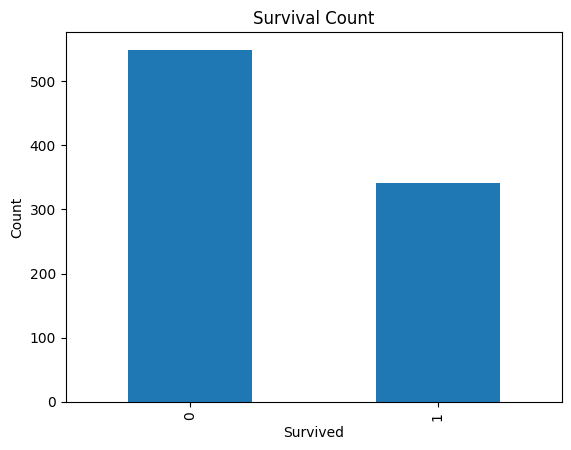

In [6]:
# Step 3: Target Variable Distribution
print("\nSurvival Distribution:")
print(train_data['Survived'].value_counts(normalize=True))  # Proportion of survivors
train_data['Survived'].value_counts().plot(kind='bar', title='Survival Count')
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


In [ ]:
# EXPLORE CATEGORICAL FEATURES


Sex Distribution:
male      577
female    314
Name: Sex, dtype: int64


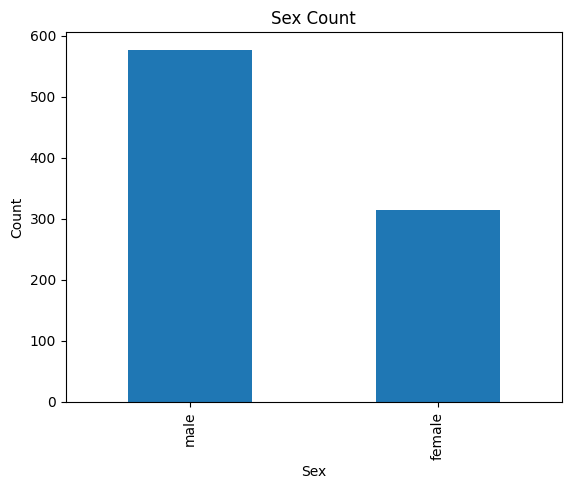


Embarked Distribution:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


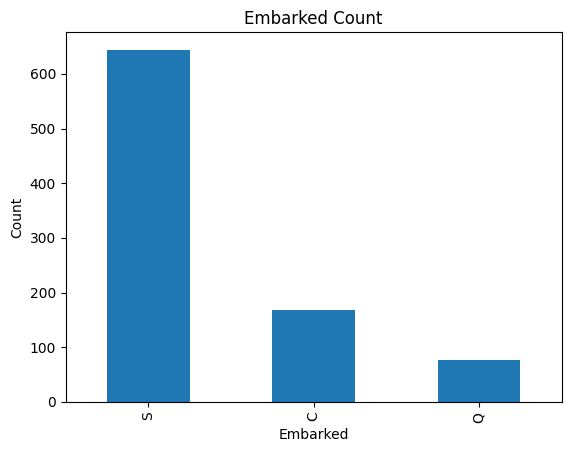


Pclass Distribution:
3    491
1    216
2    184
Name: Pclass, dtype: int64


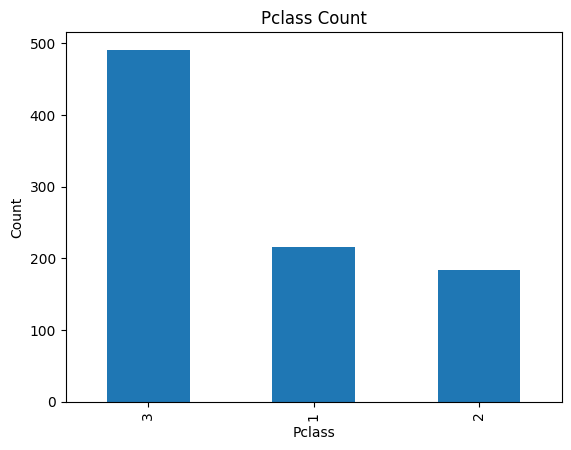

In [7]:
categorical_cols = ['Sex', 'Embarked', 'Pclass']
for col in categorical_cols:
    print(f"\n{col} Distribution:")
    print(train_data[col].value_counts())
    train_data[col].value_counts().plot(kind='bar', title=f'{col} Count')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


# EXPLORE NUMERICAL FEATURES

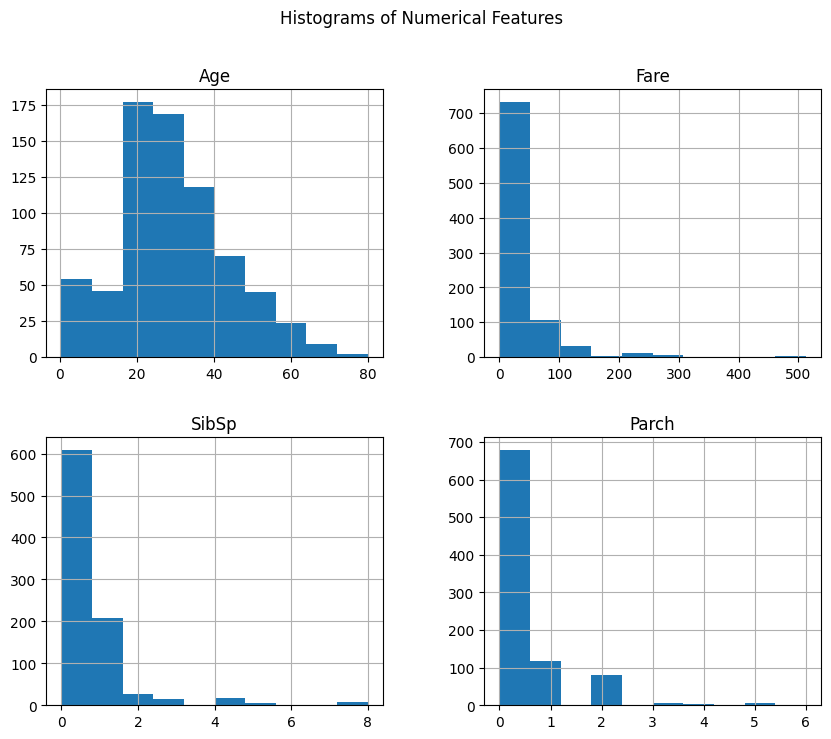

In [8]:
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
train_data[numerical_cols].hist(figsize=(10, 8))  # Histograms for all numerical features
plt.suptitle("Histograms of Numerical Features")
plt.show()


# RELATIONSHIPS BETWEEN FEATURES AND TARGET VARIABLE

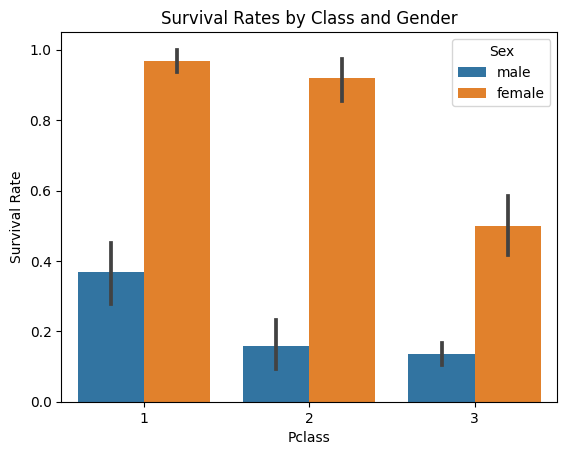

In [9]:
sns.barplot(data=train_data, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival Rates by Class and Gender')
plt.ylabel("Survival Rate")
plt.show()


C:\Users\thomas.hunter\AppData\Local\Temp\ipykernel_10304\3054180161.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train_data.corr()


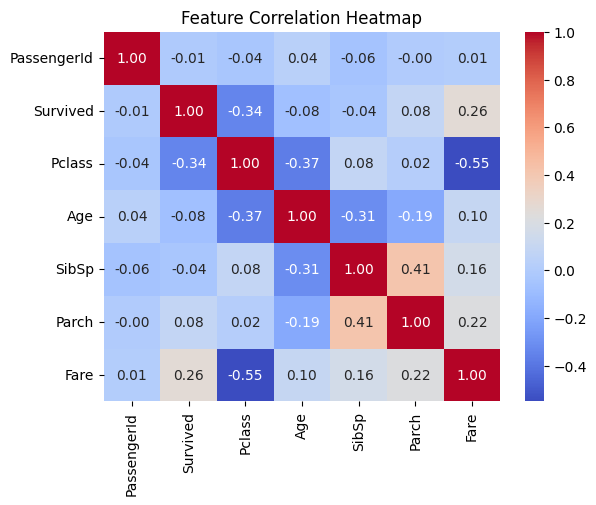

In [10]:
# Correlation Heatmap
correlation = train_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


# HANDLE MISSING VALUES

In [11]:
# Fill missing Age values with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Create a binary Age_Missing flag (optional)
train_data['Age_Missing'] = train_data['Age'].isnull().astype(int)


In [12]:
# Fill missing Cabin values with 'Unknown'
train_data['Cabin'].fillna('Unknown', inplace=True)

# Extract the deck letter from Cabin
train_data['Cabin_Deck'] = train_data['Cabin'].str[0]  # Take the first letter

# Create a binary Cabin_Missing flag
train_data['Cabin_Missing'] = (train_data['Cabin'] == 'Unknown').astype(int)


In [13]:
# Fill missing Embarked values with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


In [14]:
# APPLY TO TEST DATASET TO ENSURE CONSISTENCY
# Handle Age in the test set
test_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age_Missing'] = test_data['Age'].isnull().astype(int)

# Handle Cabin in the test set
test_data['Cabin'].fillna('Unknown', inplace=True)
test_data['Cabin_Deck'] = test_data['Cabin'].str[0]
test_data['Cabin_Missing'] = (test_data['Cabin'] == 'Unknown').astype(int)

# Handle Embarked in the test set
test_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Verify changes
print(test_data.isnull().sum())  # Ensure no missing values remain


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
Age_Missing      0
Cabin_Deck       0
Cabin_Missing    0
dtype: int64


In [15]:
# Impute missing Fare in the test set with the median from the training set
test_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)

# Verify changes
print(test_data.isnull().sum())  # Ensure no missing values remain


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Age_Missing      0
Cabin_Deck       0
Cabin_Missing    0
dtype: int64


# FEATURE ENGINEERING

Feature Engineering Steps:
Encode Categorical Variables:

Models like logistic regression require numerical inputs, so we need to convert categorical variables (e.g., Sex, Embarked, Cabin_Deck) into numeric formats.
Create Interaction Features:

Combine features to capture interactions (e.g., family size from SibSp and Parch).
Scale/Normalize Numerical Features (Optional):

Some models (e.g., logistic regression) benefit from scaling numerical features like Age and Fare.
Drop Irrelevant or Redundant Features:

Remove columns like PassengerId, Name, or Ticket that are unlikely to help the model.

1. Encode Categorical Variables
We’ll use one-hot encoding for non-ordinal variables (Embarked) and label encoding for ordinal ones (Pclass, Cabin_Deck).

In [17]:
# Label encode ordinal categorical features
label_encoder = LabelEncoder()
train_data['Pclass'] = label_encoder.fit_transform(train_data['Pclass'])
train_data['Cabin_Deck'] = label_encoder.fit_transform(train_data['Cabin_Deck'])

# One-hot encode non-ordinal categorical features
train_data = pd.get_dummies(train_data, columns=['Embarked', 'Sex'], drop_first=True)